# Introduction to Matplotlib

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt # makes matplotlib work like MATLAB
import pandas as pd
import numpy as np


[]

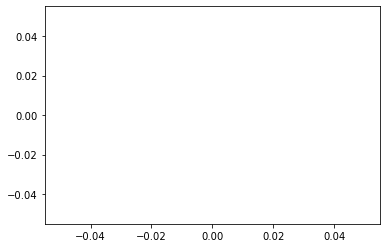

In [7]:
plt.plot() # generates an empty plot

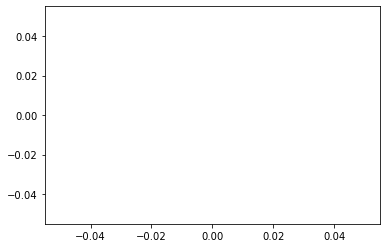

In [8]:
plt.plot();

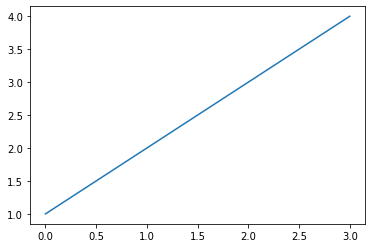

In [9]:
plt.plot([1,2,3,4]);

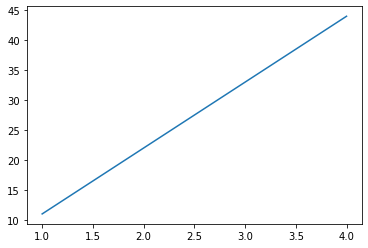

In [11]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

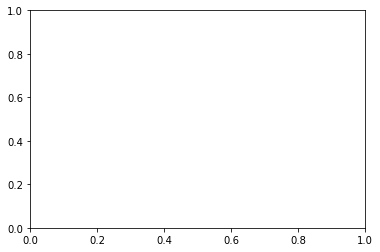

In [12]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds axis

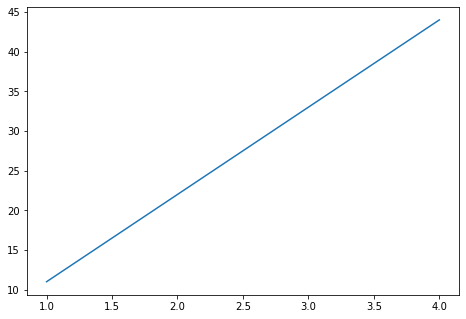

In [13]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

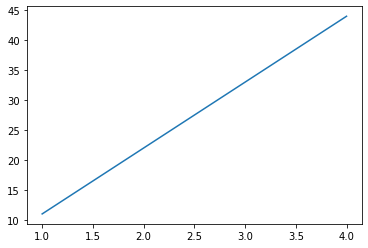

In [15]:
# 3rd recommended 
fig, ax = plt.subplots()
ax.plot(x,y); # add some data
type(fig), type(ax)

### Matplotlib example workflow

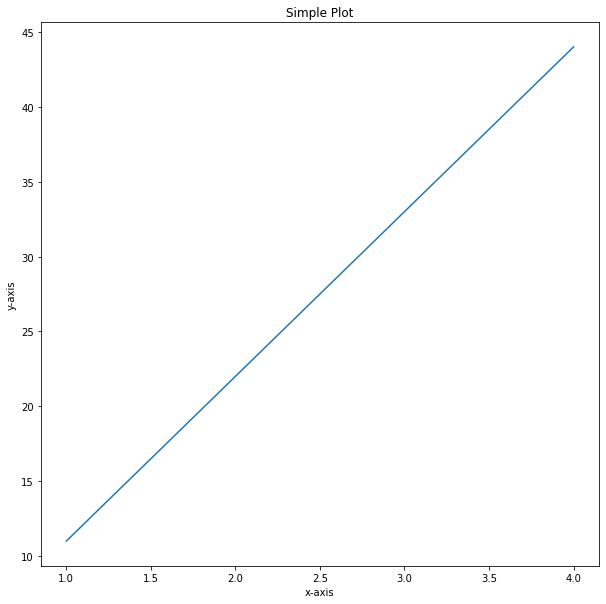

In [17]:
# 0. import matplot lib
%matplotlib inline
import matplotlib.pyplot as plt

#1. prepare data
x = [1,2,3,4]
y=[11,22,33,44]
#2. setup plot
fig, ax = plt.subplots(figsize=(10,10)) # width, height

#3. plot the data
ax.plot(x,y);

#4 customize plot
ax.set(title='Simple Plot', xlabel="x-axis", ylabel="y-axis")

#5 save and show
fig.savefig('./sample-plot.png')

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* histogram
* subplots

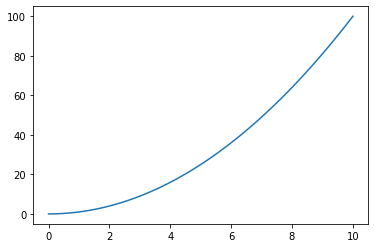

In [22]:
x = np.linspace(0,10,100) 

fig, ax = plt.subplots()
ax.plot(x, x**2);

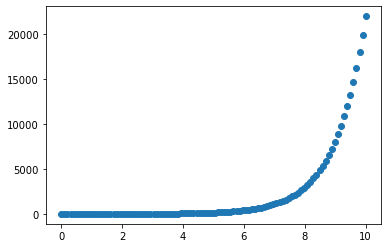

In [23]:
# use the same data to make a scatter plot
fix, ax = plt.subplots()
ax.scatter(x, np.exp(x));

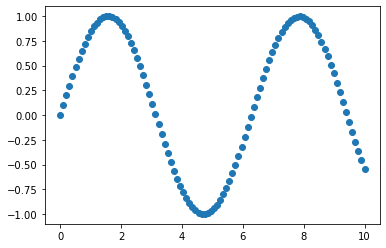

In [24]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

In [ ]:
# make a plot from a dictionary

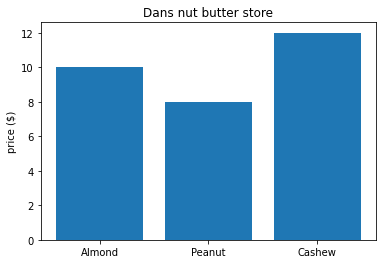

In [28]:
nut_butter_prices = {"Almond": 10, "Peanut": 8, "Cashew": 12}
fig,ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title='Dans nut butter store', ylabel='price ($)');

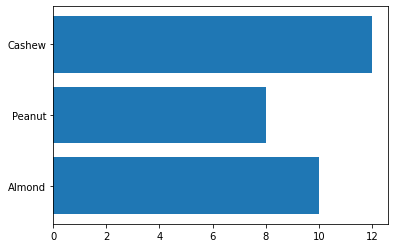

In [32]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

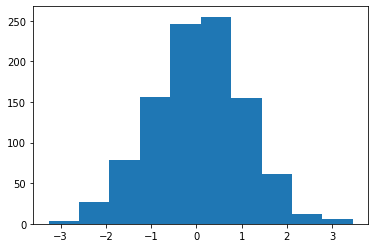

In [33]:
# make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

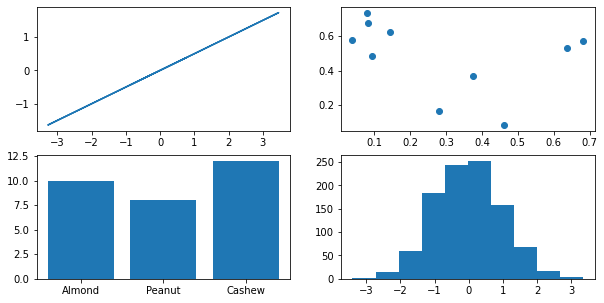

In [39]:
# Subplot option 1:
fix, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

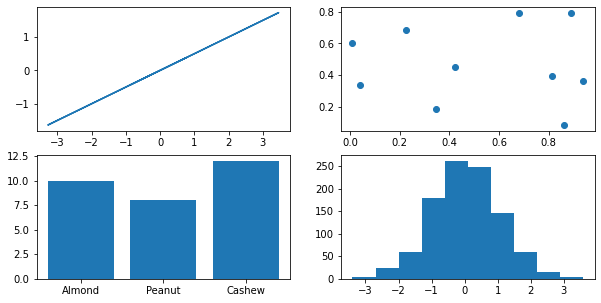

In [41]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# plot 2 each different axis to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));


### Plotting from pandas dataframes

In [1]:
import pandas as pd

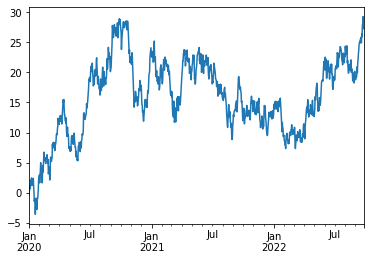

In [35]:
# make a dataframe
car_sales = pd.read_csv('../../Data/CSVs/car-sales.csv')

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot();

In [58]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [36]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

C:\Users\Brandon Carr\AppData\Local\Temp\ipykernel_18100\1986880408.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


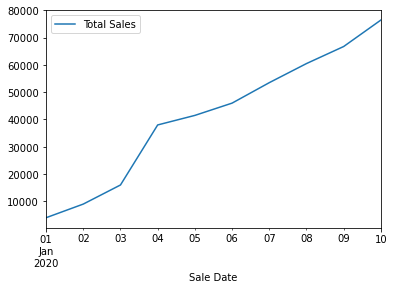

In [60]:
# let's plot the total sales over time
car_sales.plot(x="Sale Date", y="Total Sales");

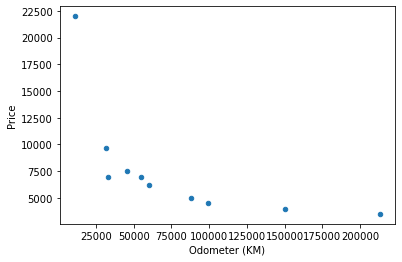

In [62]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [63]:
x = np.random.rand(10,4)
print(x)

df = pd.DataFrame(x, columns=["a", 'b', 'c', 'd'])
df

[[0.64556525 0.34789607 0.69390377 0.49732302]
 [0.4867108  0.76690648 0.548059   0.85967511]
 [0.84906747 0.82329985 0.56973103 0.91302138]
 [0.77953165 0.54572097 0.40320981 0.10492361]
 [0.05046391 0.45667359 0.9251532  0.31669531]
 [0.98006463 0.52133329 0.40822262 0.27821651]
 [0.56361962 0.44876938 0.0959748  0.91189597]
 [0.572012   0.94307942 0.93560662 0.02854763]
 [0.48656823 0.62025055 0.07473112 0.6093549 ]
 [0.46349419 0.64270461 0.34774608 0.66731308]]


,a,b,c,d
0,0.645565,0.347896,0.693904,0.497323
1,0.486711,0.766906,0.548059,0.859675
2,0.849067,0.823300,0.569731,0.913021
3,0.779532,0.545721,0.403210,0.104924
4,0.050464,0.456674,0.925153,0.316695
5,0.980065,0.521333,0.408223,0.278217
6,0.563620,0.448769,0.095975,0.911896
7,0.572012,0.943079,0.935607,0.028548
8,0.486568,0.620251,0.074731,0.609355
9,0.463494,0.642705,0.347746,0.667313


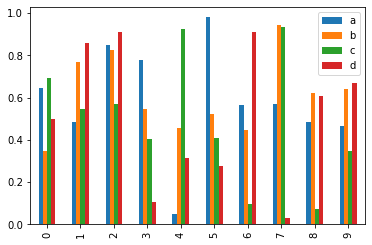

In [64]:
df.plot.bar();

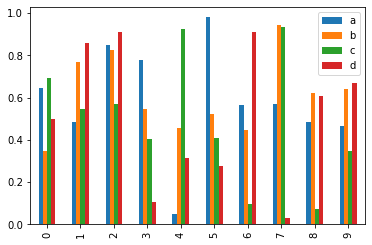

In [65]:
df.plot(kind='bar');

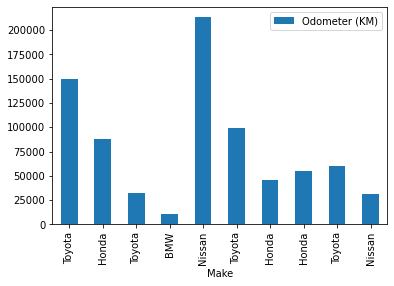

In [66]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

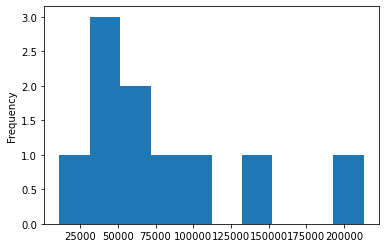

In [67]:
# histograms:
car_sales["Odometer (KM)"].plot.hist();

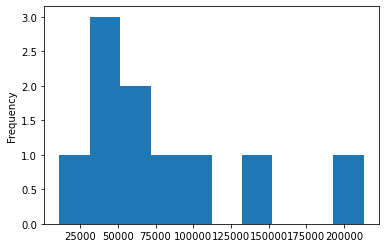

In [68]:
car_sales["Odometer (KM)"].plot(kind="hist");

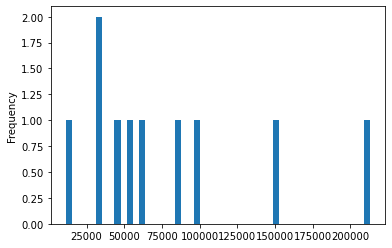

In [70]:
car_sales["Odometer (KM)"].plot.hist(bins=50);

In [2]:
heart_disease = pd.read_csv('../../Data/CSVs/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


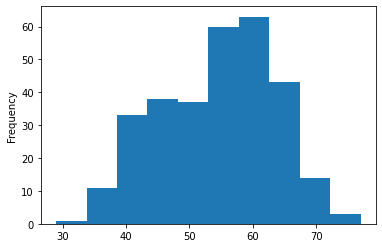

In [8]:

# create histograph of age
heart_disease['age'].plot.hist(bins=10);

In [9]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


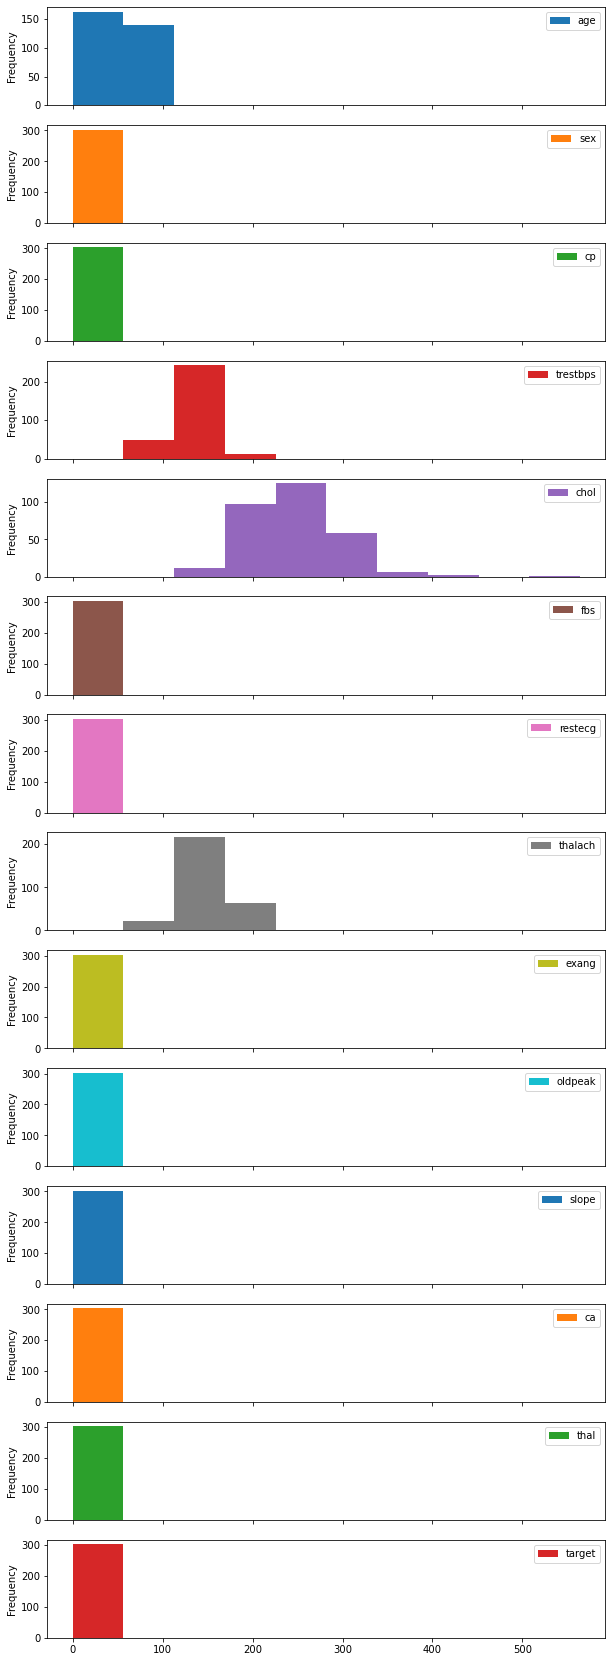

In [11]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);

### Which one should i use? (pyplot vs matplotlib OOO method?)

* when plotting something quickly, ok to use pyplot method
* when something more advanced, use the OO method.

In [12]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


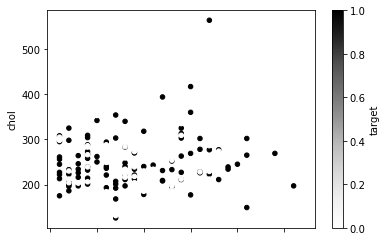

In [13]:
# pyplot method
over_50.plot(kind='scatter', x='age',y='chol', c='target');

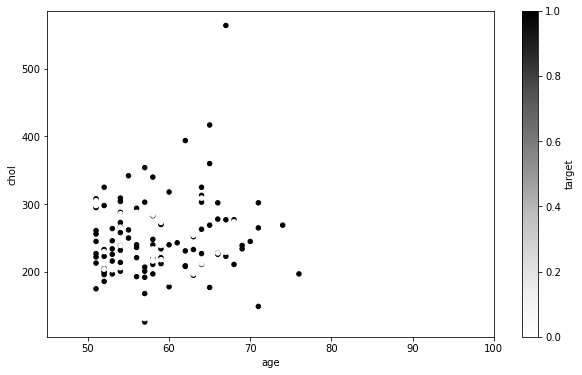

In [17]:
# oo method:
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter', x='age',y='chol', c='target', ax=ax);

# ax.set_xlim([45,100]);

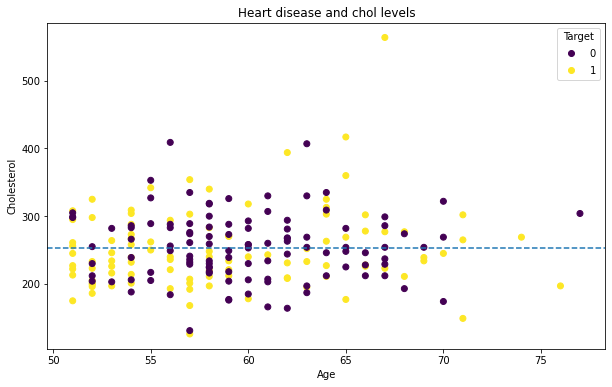

In [22]:
fix, ax = plt.subplots(figsize=(10,6))

scatter = ax.scatter(x=over_50["age"], y=over_50['chol'], c=over_50['target']);

#customize the plot
ax.set(title='Heart disease and chol levels', xlabel='Age', ylabel='Cholesterol');

# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

# add a horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--');

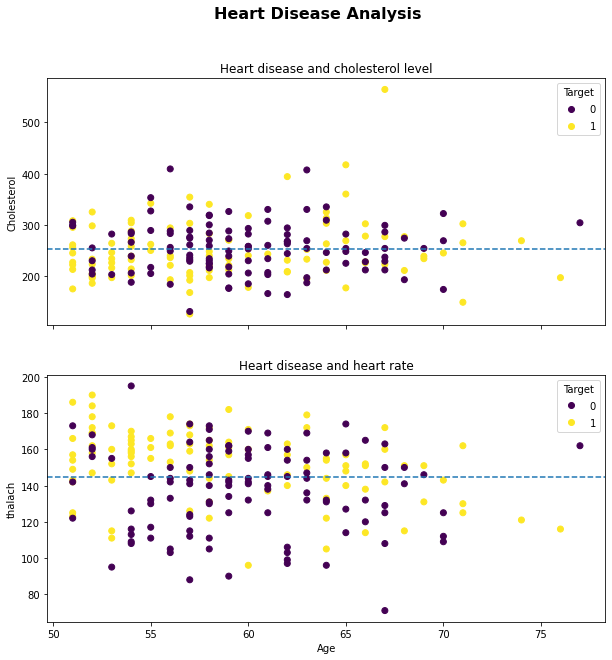

In [31]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

# add to ax0
scatter = ax0.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target']);
#customzie ax0
ax0.set(title='Heart disease and cholesterol level', ylabel='Cholesterol');
ax0.legend(*scatter.legend_elements(), title='Target');
ax0.axhline(y=over_50['chol'].mean(), linestyle='--');

scatter2 = ax1.scatter(x=over_50['age'],y=over_50['thalach'], c=over_50['target']);
ax1.set(title='Heart disease and heart rate', xlabel='Age', ylabel='thalach');
ax1.legend(*scatter2.legend_elements(), title='Target');
ax1.axhline(y=over_50['thalach'].mean(), linestyle='--');

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight='bold');

## customizing matplotlib plots and getting stylish

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

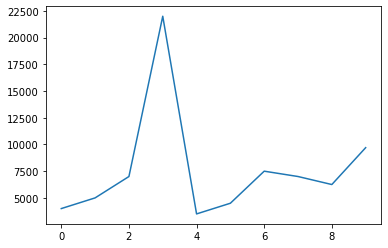

In [39]:
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales['Price'].plot();

In [40]:
plt.style.use('seaborn-whitegrid')

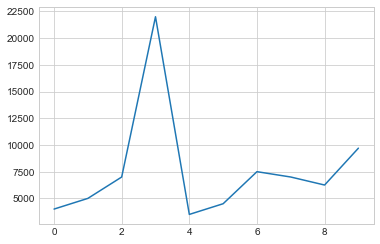

In [41]:
car_sales['Price'].plot();

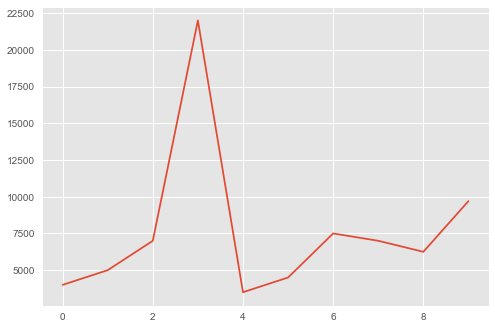

In [44]:
plt.style.use('ggplot')
car_sales['Price'].plot();

matplotlib.axes._subplots.AxesSubplot

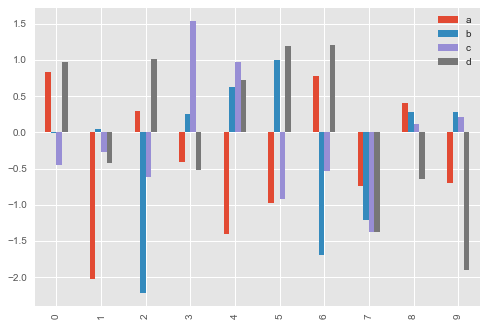

In [47]:
# create data
x = np.random.randn(10,4)
df = pd.DataFrame(x, columns=['a','b','c','d'])

ax = df.plot(kind='bar')
type(ax)

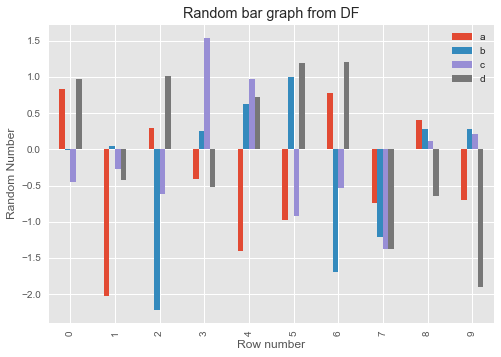

In [49]:
ax = df.plot(kind='bar')
# add labels and a title
ax.set(title='Random bar graph from DF', xlabel='Row number', ylabel='Random Number')
ax.legend().set_visible(True)

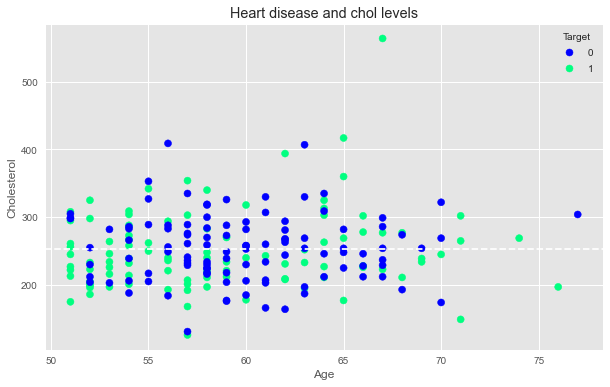

In [56]:
fix, ax = plt.subplots(figsize=(10,6))

# adding the cmap argument changes the color scheme.
scatter = ax.scatter(x=over_50["age"], y=over_50['chol'], c=over_50['target'],
                    cmap='winter')

#customize the plot
ax.set(title='Heart disease and chol levels', xlabel='Age', ylabel='Cholesterol');

# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

# add a horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--');

## Saving & Sharing Plots

* first, can generate then right-click and save file (downloads it).
* second, savefig() method.

In [57]:
fig.savefig('heart-disease-saved-with-code.png')